<a href="https://colab.research.google.com/github/FrancescoGazzani/CoderDS1/blob/main/ProyectoDS_ParteI_Gazzani_Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Our Dataset

In [ ]:
# importar las librerias que usaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [18]:
# Montar el sistema de archivos de Google Drive
drive.mount('/content/drive')

# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Coder_DS_1/Pokemon.csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv(file_path, delimiter=';')

df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,896,Glastrier,Ice,NaN,580,100,145,130,65,110,30,8,True
1068,897,Spectrier,Ghost,NaN,580,100,65,60,145,80,130,8,True
1069,898,Calyrex,Psychic,Grass,500,100,80,80,80,80,80,8,True
1070,898,Ice Rider Calyrex,Psychic,Ice,680,100,165,150,85,130,50,8,True


# Correcion de Dataset

## Error en type1

Mientras se estaban probando diferentes visualizaciones sobre el dataset se descubrio que hay una fila con type1 = Blastoise. Lo cual no tiene sentido porque ese es el nombre del pokemon

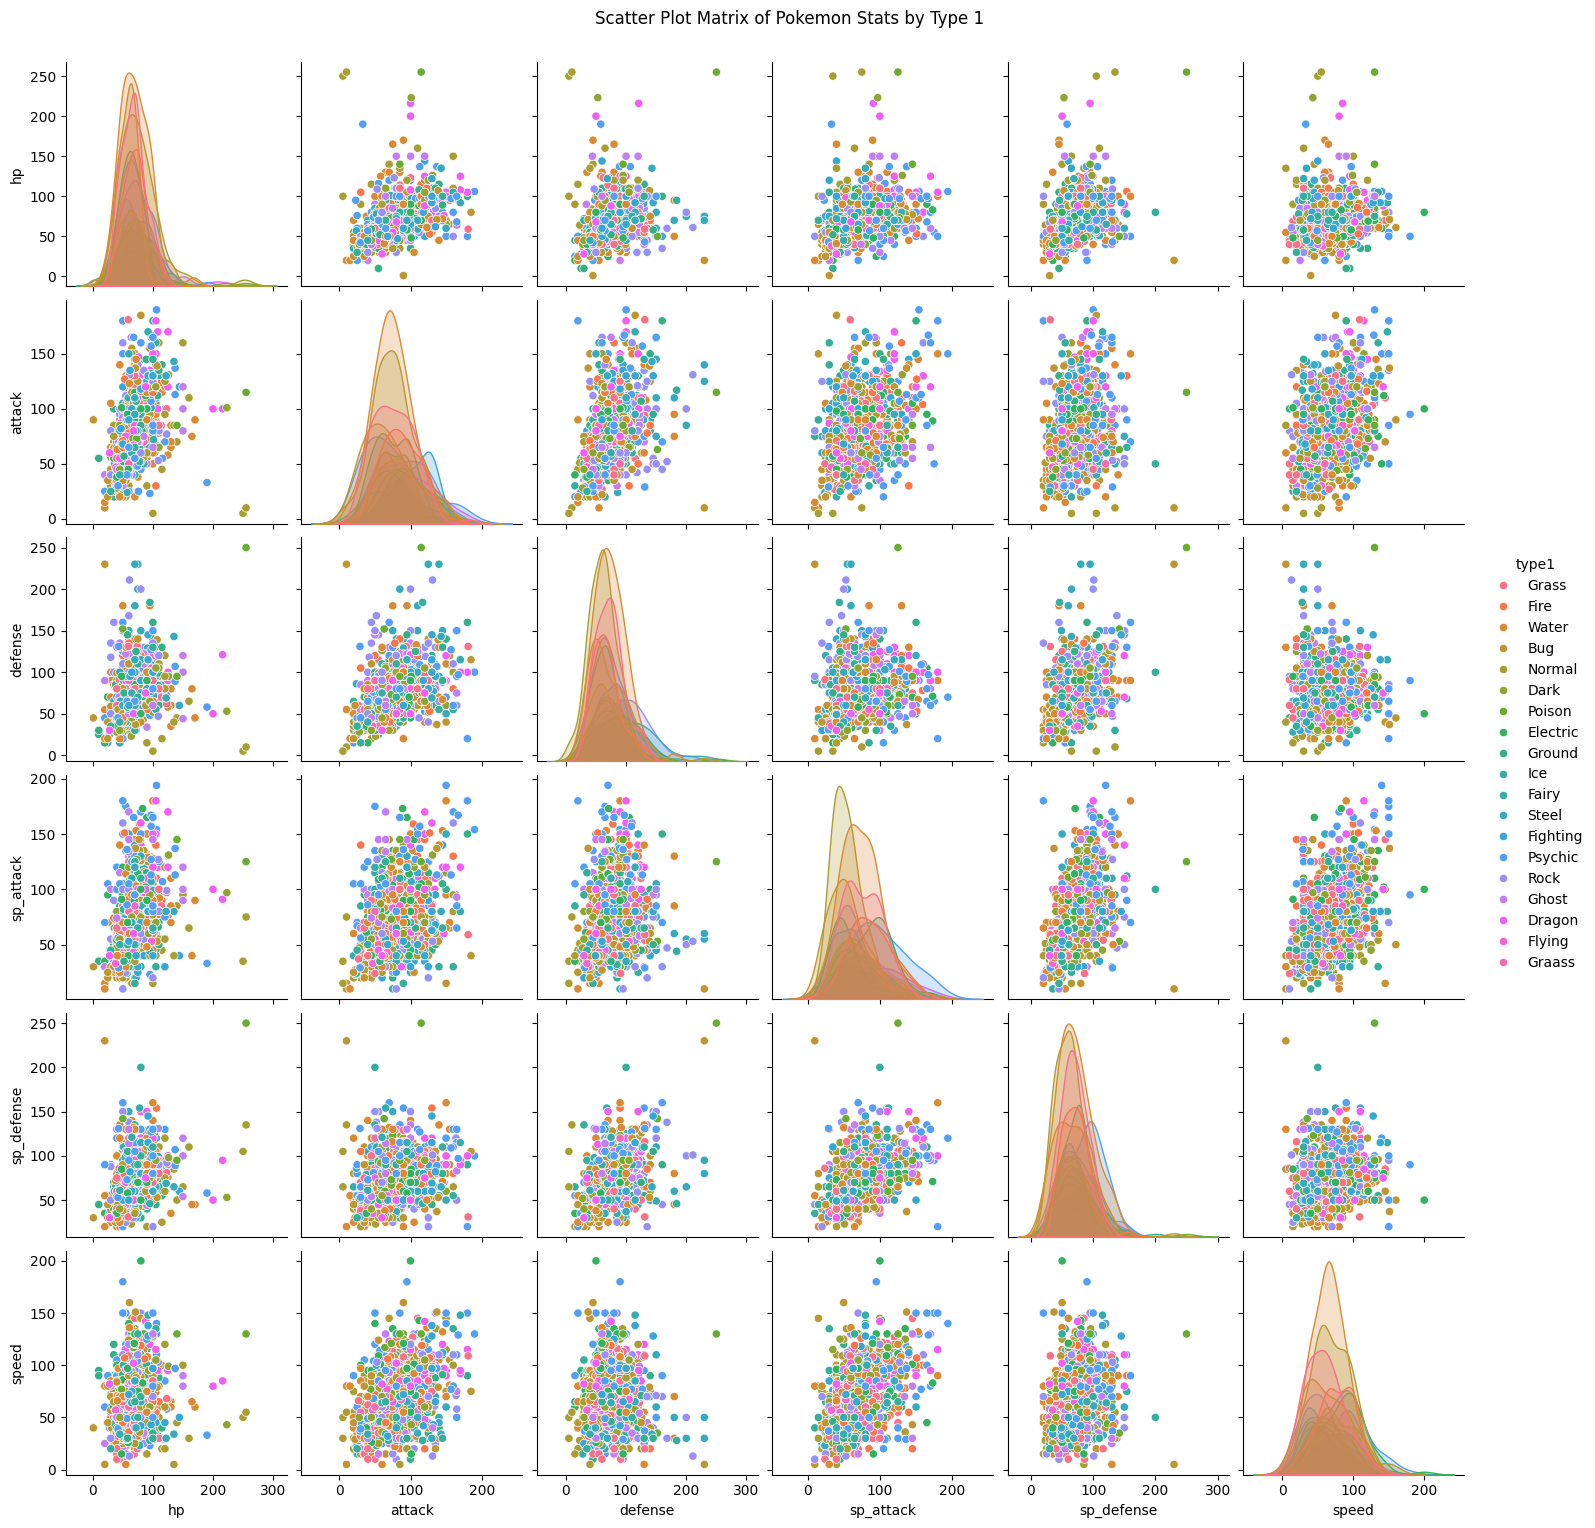

In [24]:
# Scatter plot matrix to visualize relationships between stats and Type 1
sns.pairplot(df, hue='type1', vars=['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed'])
plt.suptitle('Scatter Plot Matrix of Pokemon Stats by Type 1', y=1.02)
plt.show()

In [19]:
#Como podemos encontrar la fila exacta con este error
blastoise_df = df[df['type1'] == 'Blastoise']
blastoise_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


Entonces para reemplazarlo tendremos

In [20]:
# Encuentra el índice de la fila donde 'type1' es 'Blastoise'
index_to_change = df[df['type1'] == 'Blastoise'].index[0]

# Cambia los valores en la fila
df.loc[index_to_change, 'type1'] = 'Water'
df.loc[index_to_change, 'type2'] = None

# Muestra la fila actualizada (estamos sobreescribiendo nuestra variable derfinida anteriormente)
blastoise_df = df[df['name'] == 'Gigantamax Blasoise']
blastoise_df

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Water,None,530,79,83,100,85,105,78,1,False


## Reemplazo de valores nulos

Comprobamos si en nuestra base de datos encontramos valores nulos y en que columnas

In [10]:
df.isnull().sum()

,0
number,0
name,0
type1,0
type2,498
total,0
hp,0
attack,0
defense,0
sp_attack,0
sp_defense,0


Reemplazamos estos con la palabra "None" pues no tienen segundo tipo

In [11]:
df['type2'].fillna('None', inplace=True)

Comprobamos que ya no hay mas valores nulos

In [12]:
df.isnull().sum()

,0
number,0
name,0
type1,0
type2,0
total,0
hp,0
attack,0
defense,0
sp_attack,0
sp_defense,0


# Breve explicacion de atributos

* Number: The ID for each pokemon

* Name: The name of each pokemon

* Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

* Type 2: Some pokemon are dual type and have 2

* Total: Sum of all stats that come after this, a general guide to how strong a pokemon is

* HP: Hit points, or health, defines how much damage a pokemon can withstand before fainting

* Attack: The base modifier for normal attacks (eg. Scratch, Punch)

* Defense: The base damage resistance against normal attacks

* SP Atk: Special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

* SP Def: Special defense, the base damage resistance against special attacks

* Speed: Determines which pokemon attacks first each round

* Generation: The generation of games where the pokemon was first introduced

* Legendary: Some pokemon are much rarer than others, and are dubbed "legendary"





# Hypothesis

## Hypothesis 1: Stats and generations

Can we analyze the relationship between a Pokemon's generation and its stats? This could involve comparing the average stats of Pokemon across different generations and visualizing the trends.

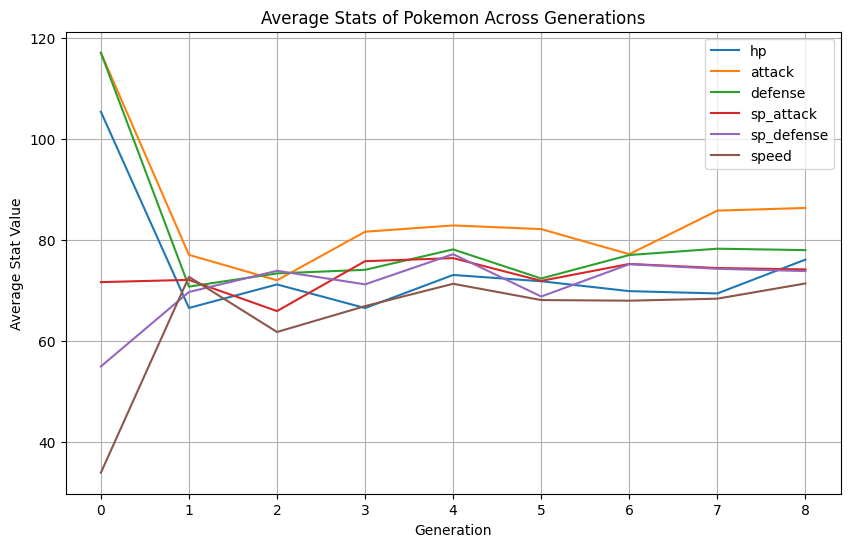

In [25]:

# Group Pokemon by generation and calculate the average stats for each generation
generation_stats = df.groupby('generation')[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()

# Plot the average stats for each generation
generation_stats.plot(kind='line', figsize=(10, 6))
plt.title('Average Stats of Pokemon Across Generations')
plt.xlabel('Generation')
plt.ylabel('Average Stat Value')
plt.grid(True)
plt.show()

Conclusiones:


- Parece haber una tendencia general a que los Pokémon de generaciones posteriores tengan estadísticas promedio más altas.
- La generación 1 parece tener las estadísticas promedio más bajas en la mayoría de las categorías.
- La generación 3 destaca con estadísticas promedio particularmente altas en ataque, defensa y velocidad.
- Las estadísticas especiales de ataque y defensa (sp_attack y sp_defense) muestran un aumento más gradual a lo largo de las generaciones en comparación con las estadísticas físicas.

## Possible Datasets

1. Can we predict the Type 1 of a Pokemon based on its stats (HP, Attack, Defense, etc.)? This could involve classification algorithms like decision trees or logistic regression.

2. Can we identify clusters of Pokemon based on their stats? This could involve clustering algorithms like K-means or hierarchical clustering.

3. Can we predict the legendary status of a Pokemon based on its stats and types? This would be a binary classification problem.

4. Can we build a regression model to predict the "Total" stat of a Pokemon based on its individual stats (HP, Attack, Defense, etc.)?

5. Can we predict the "Speed" of a Pokemon based on its other stats and types? This could be a regression problem.

6. Can we analyze the distribution of Pokemon types and identify any imbalances or interesting patterns? This could involve exploratory data analysis and visualization.

7. Can we analyze the correlation between different stats (e.g., Attack and Defense) and visualize these relationships? This could involve correlation matrices and scatter plots.

8. Can we build a recommender system that suggests Pokemon with similar stats or types based on a user's preferences? This could involve collaborative filtering or content-based filtering techniques.

9. Can we analyze the relationship between a Pokemon's generation and its stats? This could involve comparing the average stats of Pokemon across different generations and visualizing the trends.

10. Can we build a model to predict the evolution of a Pokemon based on its current stats and type? This could involve classifying Pokemon into their evolutionary stages (basic, stage 1, stage 2, etc.) based on their characteristics.

11. Can we predict the primary type of a Pokemon based solely on its name using Natural Language Processing (NLP) techniques? This would involve text analysis and classification algorithms.

12. Can we create a generative model to generate new, unique Pokemon with stats and types based on the existing dataset? This could involve techniques like Generative Adversarial Networks (GANs) or Variational Autoencoders (VAEs).

13. Can we predict the effectiveness of a particular move against a Pokemon based on its types and stats? This could involve building a multi-class classification model where the classes represent the effectiveness levels (e.g., "super effective", "not very effective", "normal").

14. Can we analyze the evolution patterns of Pokemon and predict the stat changes that occur during evolution? This could involve building a regression model to predict the change in each stat (HP, Attack, Defense, etc.) when a Pokemon evolves.

15. Can we predict the popularity of a Pokemon based on its stats, types, and legendary status? This could involve collecting data on Pokemon popularity (e.g., from fan websites or social media) and building a regression model to predict popularity scores.

16. Can we build a model to classify Pokemon into different tiers based on their competitive viability in battles? This could involve using data from competitive Pokemon battles and building a multi-class classification model to categorize Pokemon into tiers like OU (OverUsed), UU (UnderUsed), etc.

## Hypothesis 3: Legendary vs Non-Legendary

Can we predict the legendary status of a Pokemon based on its stats and type? This could involve classification algorithms like Support Vector Machines or Random Forests.

In [ ]:
# Hypothesis 3: Predicting legendary status
# Box plot to compare stats of legendary vs. non-legendary Pokemon
plt.figure(figsize=(10, 6))
sns.boxplot(x='legendary', y='total', data=df)
plt.xlabel('legendary')
plt.ylabel('Total Stats')
plt.title('Distribution of Total Stats for Legendary vs. Non-Legendary Pokemon')
plt.show()

Conclusiones:

- Legendary Pokemon generally have significantly higher total stats compared to non-legendary ones.
- This suggests that stats could be a strong predictor of legendary status, although other factors might be involved.